In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [6]:
params = parse_experiment_params("../experiments_params/case_3.json")
params.extend([
    {
        "graph_type": 'barabasi',
        'network_size': 500,
        'memory_size': 256,
        'code_length': 5,
        'kappa': 0,
        'lambd': 0,
        'alpha': 0.4,
        'omega': 0.4,
        'gamma': 0,
        'preferential_attachment': 2,
        'polarization_type': 0
    },
    {
        "graph_type": 'barabasi',
        'network_size': 500,
        'memory_size': 256,
        'code_length': 5,
        'kappa': 30,
        'lambd': 0,
        'alpha': 0.4,
        'omega': 0.4,
        'gamma': 0,
        'preferential_attachment': 2,
        'polarization_type': 0
    },
    {
        "graph_type": 'barabasi',
        'network_size': 500,
        'memory_size': 256,
        'code_length': 5,
        'kappa': 30,
        'lambd': 1,
        'alpha': 0.4,
        'omega': 0.4,
        'gamma': 0,
        'preferential_attachment': 2,
        'polarization_type': 0
    },
    {
        "graph_type": 'barabasi',
        'network_size': 500,
        'memory_size': 256,
        'code_length': 5,
        'kappa': 15,
        'lambd': 1,
        'alpha': 0.4,
        'omega': 0.4,
        'gamma': 0,
        'preferential_attachment': 2,
        'polarization_type': 0
    }
])
results = get_experiment_mean_data(params, "../results/case_3/")

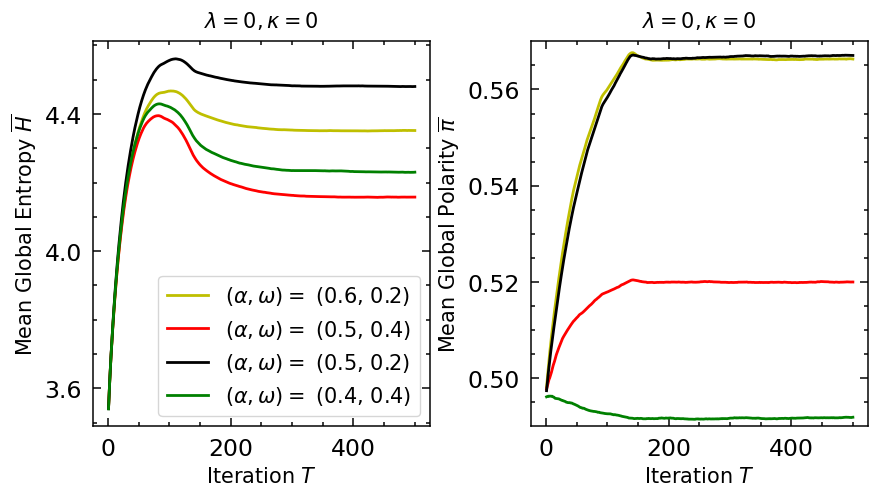

In [10]:
# parameters 

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 0$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "darkgreen",
    (0.5, 0.5): "lightblue",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

valid_combinations = {(0.5, 0.2), (0.6, 0.2), (0.4, 0.4), (0.5, 0.4)}

X = np.arange(1, 500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X, 
        results[make_tuple(p)]['polarity'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width, 
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
axs[0].legend(loc = 'lower right', fontsize = 15)

fig.subplots_adjust(wspace = 0.3)
axs[1].set_ylabel(r"Mean Global Polarity $\overline{\pi}$")

axs[1].set_ylim([0.49, 0.57])

from matplotlib.ticker import MaxNLocator
axs[1].yaxis.set_major_locator(MaxNLocator(4))

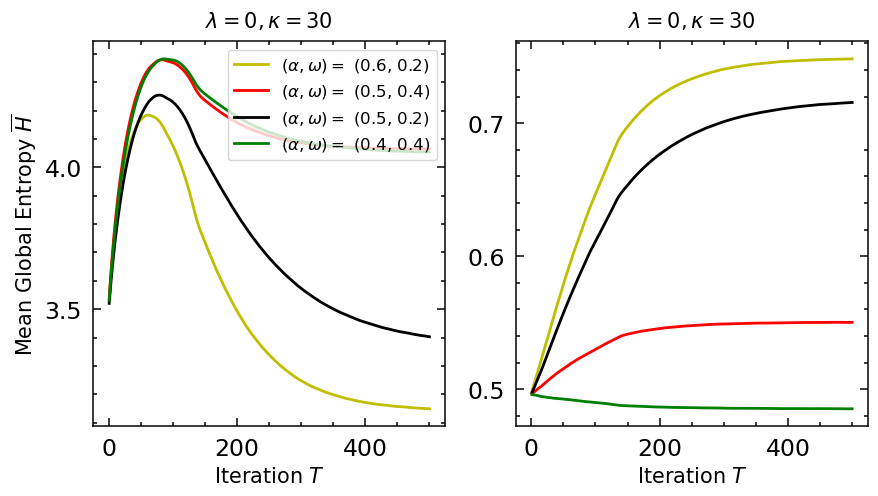

In [7]:
# parameters 

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 30$",
    r"$\lambda = 0, \kappa = 30$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "darkgreen",
    (0.5, 0.5): "lightblue",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

valid_combinations = {(0.5, 0.2), (0.6, 0.2), (0.4, 0.4), (0.5, 0.4)}

X = np.arange(1, 500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 30 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 30 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X, 
        results[make_tuple(p)]['polarity'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width, 
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
axs[0].legend(loc = 'upper right', fontsize = 12)

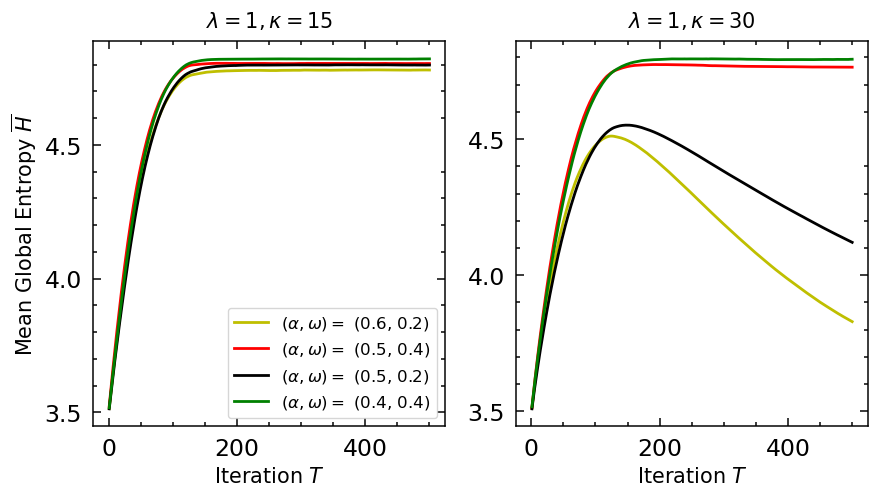

In [8]:
# parameters 

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 1, \kappa = 15$",
    r"$\lambda = 1, \kappa = 30$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "darkgreen",
    (0.5, 0.5): "lightblue",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

valid_combinations = {(0.5, 0.2), (0.6, 0.2), (0.4, 0.4), (0.5, 0.4)}

X = np.arange(1, 500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 15 \
        and x['lambd'] == 1 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 30 \
        and x['lambd'] == 1 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width, 
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
axs[0].legend(loc = 'lower right', fontsize = 12)

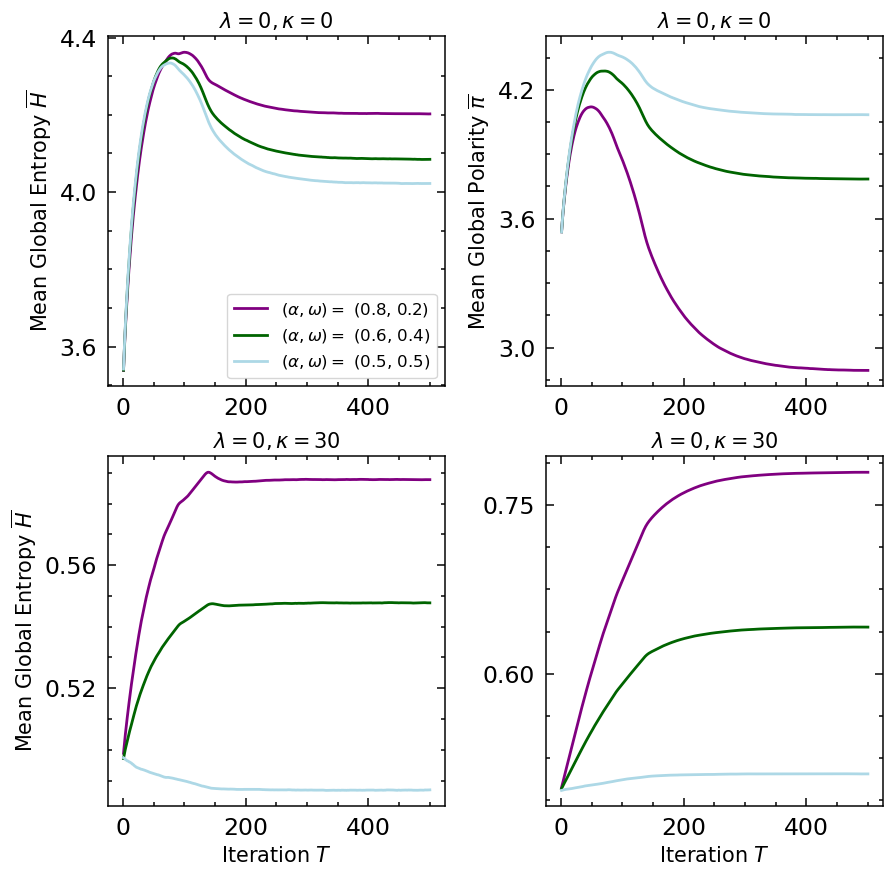

In [42]:
# parameters 

nrows = 2
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 0$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "darkgreen",
    (0.5, 0.5): "lightblue",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

valid_combinations = {(0.8, 0.2), (0.6, 0.4), (0.5, 0.5)}

X = np.arange(1, 500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0][0].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1][0].plot(
        X, 
        results[make_tuple(p)]['polarity'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width, 
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 30 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0][1].plot(
        X, 
        results[make_tuple(p)]['entropy'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
selected_params = [x for x in params if \
    x['kappa'] == 30 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1][1].plot(
        X, 
        results[make_tuple(p)]['polarity'], 
        c = alpha_omega_color[(p['alpha'], p['omega'])], 
        linewidth = line_width, 
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    
fig.subplots_adjust(wspace = 0.3)

axs[0][0].set_ylabel(r"Mean Global Entropy $\overline{H}$")
axs[0][1].set_ylabel(r"Mean Global Polarity $\overline{\pi}$")

axs[0][0].set_title(r"$\lambda = 0, \kappa = 0$", fontsize = 15)
axs[0][1].set_title(r"$\lambda = 0, \kappa = 0$", fontsize = 15)
axs[1][0].set_title(r"$\lambda = 0, \kappa = 30$", fontsize = 15)
axs[1][1].set_title(r"$\lambda = 0, \kappa = 30$", fontsize = 15)

axs[0][0].legend(loc = 'lower right', fontsize = 12)